In [1]:
import numpy as np
import pandas as pd
import pickle 

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import scripts.map_and_average as mapper
import scripts.classification as classification

## Feature learning and write output

In [ ]:
print "mapping..."
data_list, pcadata_list, ldadata_list, nmfdata_list, ssnmfdata_list, classlabs, audiolabs = mapper.map_and_average_frames(min_variance=0.99)
mapper.write_output(data_list, pcadata_list, ldadata_list, nmfdata_list, ssnmfdata_list, classlabs, audiolabs)

## Classification

In [2]:
df_results = classification.classify_for_filenames(file_list=mapper.OUTPUT_FILES)

/homes/mp305/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/homes/mp305/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


KNN LDA 0.151978449974
LDA LDA 0.320669835863
SVM LDA 0.0231101788399
RF LDA 0.0742913265128
KNN LDA 0.0547390436205
LDA LDA 0.150312531138
SVM LDA 0.0787628988868
RF LDA 0.0427708629723
KNN LDA 0.0232330458268
LDA LDA 0.0702474072041
SVM LDA 0.050068706152
RF LDA 0.0193967985786
KNN LDA 0.281733731607
LDA LDA 0.198582742899
SVM LDA 0.296355560166
RF LDA 0.132752660164
KNN LDA 0.0857923493684
LDA LDA 0.107355289483
SVM LDA 0.0896098014444
RF LDA 0.0419252843345
KNN PCA 0.140643930221
LDA PCA 0.175099072208
SVM PCA 0.0149273059799
RF PCA 0.044347638128
KNN PCA 0.052516908106
LDA PCA 0.055028942176
SVM PCA 0.0479512645907
RF PCA 0.0325567872284
KNN PCA 0.0268729640269
LDA PCA 0.0459303318699
SVM PCA 0.0386730267598
RF PCA 0.0184694543728
KNN PCA 0.220850433533
LDA PCA 0.161502657527
SVM PCA 0.245790916558
RF PCA 0.131939188698
KNN PCA 0.0814272808267
LDA PCA 0.0839732813486
SVM PCA 0.0918638232782
RF PCA 0.0449817232296
KNN NMF 0.114298949339
LDA NMF 0.178244078869
SVM NMF 0.016405566300

Sort results by accuracy of all features ('All' - Column 2)

In [6]:
df_results_sorted = df_results.sort_values(2, ascending=False, inplace=False)
df_results_sorted.head()
print df_results_sorted.to_latex(index=False)

\begin{tabular}{llrrrrr}
\toprule
     0 &    1 &         2 &         3 &         4 &         5 &         6 \\
\midrule
   LDA &  LDA &  0.320670 &  0.150313 &  0.070247 &  0.198583 &  0.107355 \\
 SSNMF &  LDA &  0.183202 &  0.053345 &  0.038873 &  0.165382 &  0.081976 \\
   NMF &  LDA &  0.178244 &  0.058666 &  0.046366 &  0.166222 &  0.085643 \\
    NA &  LDA &  0.176954 &  0.059945 &  0.037882 &  0.191218 &  0.083935 \\
   PCA &  LDA &  0.175099 &  0.055029 &  0.045930 &  0.161503 &  0.083973 \\
   LDA &  KNN &  0.151978 &  0.054739 &  0.023233 &  0.281734 &  0.085792 \\
 SSNMF &  KNN &  0.143227 &  0.043130 &  0.015224 &  0.227101 &  0.071541 \\
   PCA &  KNN &  0.140644 &  0.052517 &  0.026873 &  0.220850 &  0.081427 \\
    NA &  KNN &  0.140075 &  0.051532 &  0.027336 &  0.221769 &  0.081473 \\
   NMF &  KNN &  0.114299 &  0.043058 &  0.028528 &  0.177820 &  0.079545 \\
    NA &   RF &  0.084140 &  0.045801 &  0.022834 &  0.118752 &  0.052336 \\
   LDA &   RF &  0.075053 &  0.04

## Confusion matrix

According to results above, best classifier = LDA and best transformation = LDA.

In [3]:
accuracy, CF, labels = classification.confusion_matrix_for_dataset(df_results, classifier='LDA', filename=mapper.OUTPUT_FILES[0])

In [4]:
print accuracy

0.320669835863


Use the figure functionality to zoom in the confusion matrix.

<IPython.core.display.Javascript object>


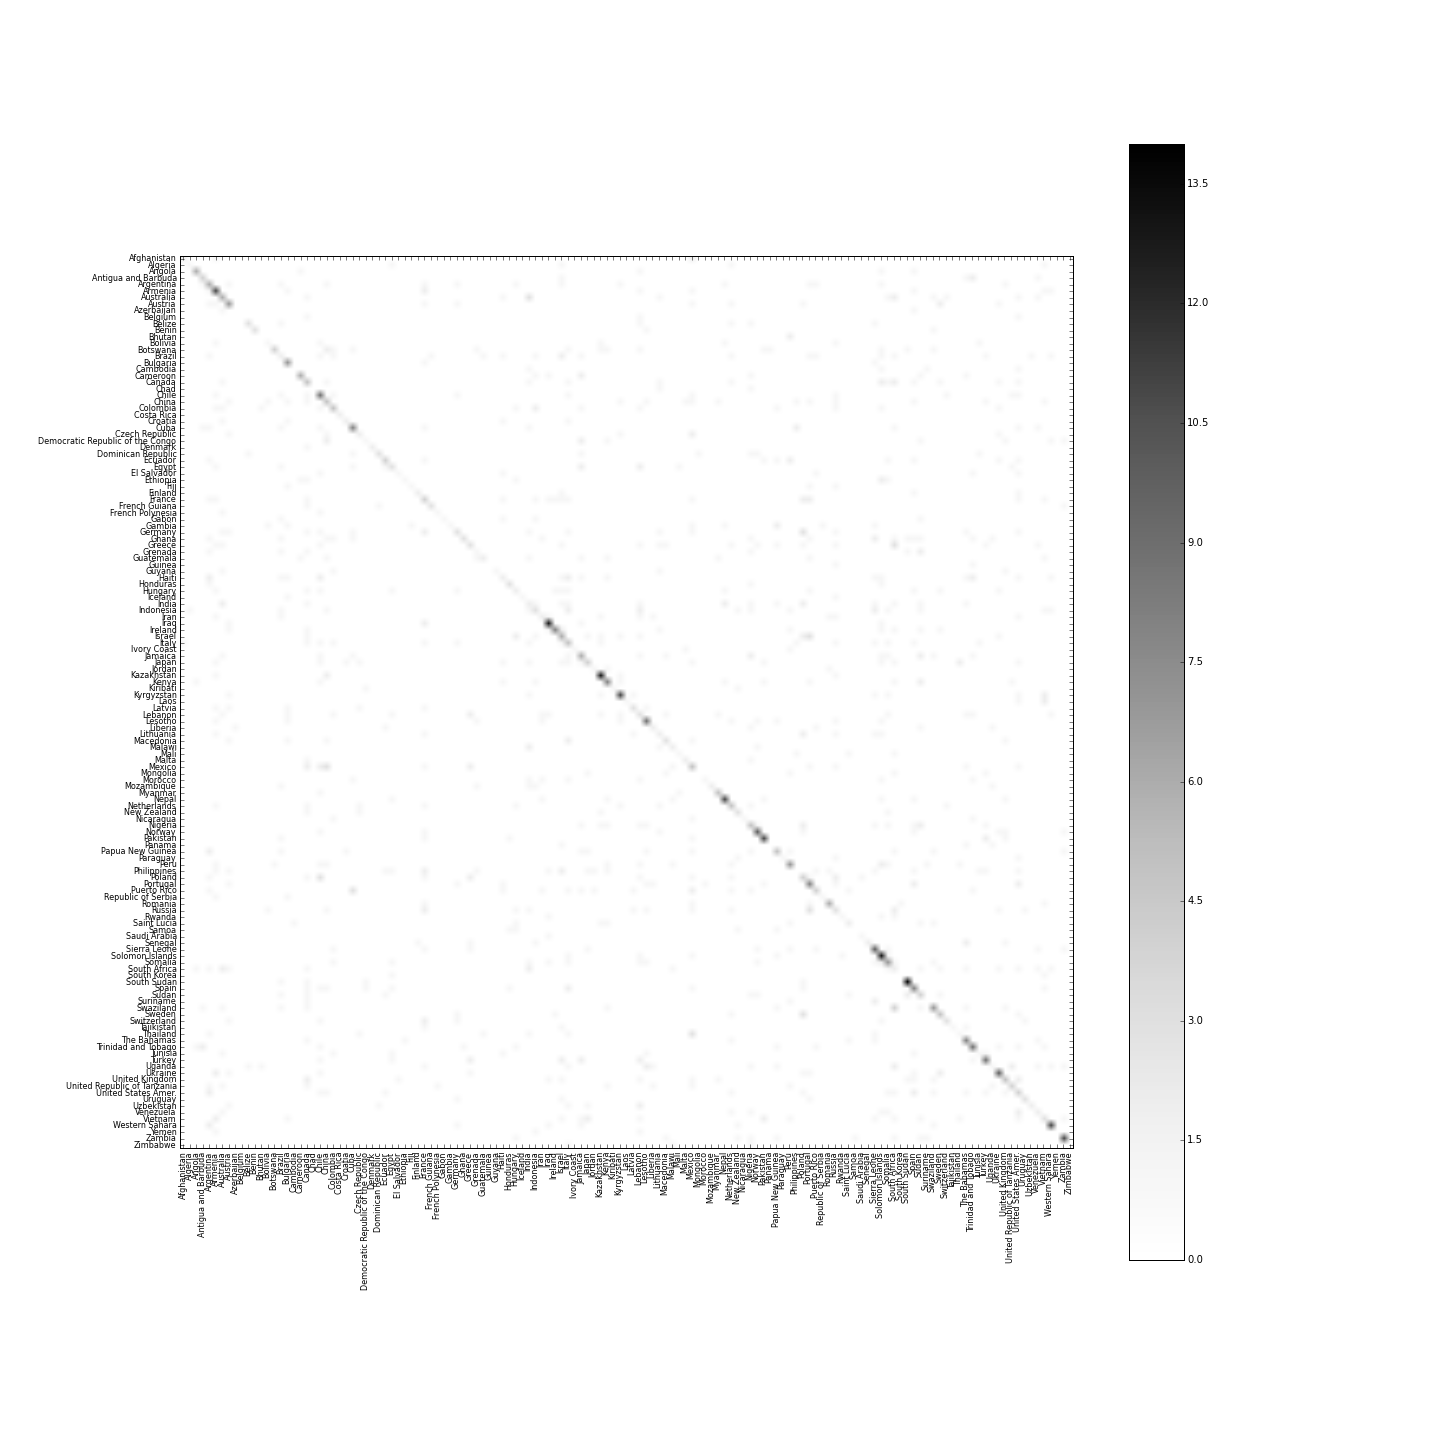

In [12]:
%matplotlib notebook
plt.figure(figsize=(20, 20))
classification.plot_CF(CF, labels=labels)